In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sn

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [2]:
data_all = "Output/2019_2020_mixed_beverage"
df_all = pd.read_csv(data_all, encoding="utf-8")
file_path = "Output/census_data.csv"
censusdf = pd.read_csv(file_path, encoding="utf-8")

In [28]:
censusdf2 = censusdf.loc[censusdf['Per Capita Income']<200000]


114734.0

In [7]:
censusdf2.rename(columns={'Zipcode' : 'location_zip'},inplace=True)


C:\Users\19729\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
#efficient way to extract year from string format date
df_all['year'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).year
df_all['month'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).month
city_mask = (df_all.location_city == "HOUSTON")|(df_all.location_city == "DALLAS")|(df_all.location_city == "FORT WORTH")|(df_all.location_city == "SAN ANTONIO")|(df_all.location_city == "AUSTIN")
dfcities = df_all[city_mask]
dfcities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44006 entries, 3 to 119998
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   taxpayer_number                      44006 non-null  int64  
 1   taxpayer_name                        44006 non-null  object 
 2   taxpayer_address                     44006 non-null  object 
 3   taxpayer_city                        44006 non-null  object 
 4   taxpayer_state                       43992 non-null  object 
 5   taxpayer_zip                         43992 non-null  float64
 6   taxpayer_county                      44006 non-null  int64  
 7   location_number                      44006 non-null  int64  
 8   location_name                        44006 non-null  object 
 9   location_address                     44006 non-null  object 
 10  location_city                        44006 non-null  object 
 11  location_state             

In [9]:
#2019 zips vs census data
mask_2019 = dfcities.year == 2019
df_2019 = dfcities[mask_2019]
zip_sales_2019 = pd.DataFrame(df_2019.groupby('location_zip')['total_receipts'].sum()).reset_index()
regres_2019 = pd.merge(zip_sales_2019,censusdf2,on="location_zip",how="left")
clean_regress_2019 = regres_2019.dropna(how='any')
clean_regress_2019.corr()['total_receipts'].reset_index()
clean_regress_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 273
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location_zip       270 non-null    int64  
 1   total_receipts     270 non-null    int64  
 2   Population         270 non-null    float64
 3   Median Age         270 non-null    float64
 4   Household Income   270 non-null    float64
 5   Per Capita Income  270 non-null    float64
 6   Poverty Count      270 non-null    float64
 7   Poverty Rate       270 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 19.0 KB


In [29]:
#2020 zips vs census data
mask_2020 = dfcities.year == 2020
df_2020 = dfcities[mask_2020]
zip_sales_2020 = pd.DataFrame(df_2020.groupby('location_zip')['total_receipts'].sum()).reset_index()
regres_2020 = pd.merge(zip_sales_2020,censusdf2,on="location_zip",how="left")
clean_regress_2020 = regres_2020.dropna(how='any')
clean_regress_2020.corr()['total_receipts'].reset_index()
clean_regress_2020.corr()

,location_zip,total_receipts,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
location_zip,1.000000,-0.045492,-0.040948,0.054444,-0.019764,0.031247,-0.129663,-0.157454
total_receipts,-0.045492,1.000000,-0.085313,0.122639,0.045114,0.485268,-0.169553,-0.153247
Population,-0.040948,-0.085313,1.000000,-0.263761,0.137042,-0.221202,0.705509,0.022380
Median Age,0.054444,0.122639,-0.263761,1.000000,0.242547,0.531479,-0.468118,-0.334846
Household Income,-0.019764,0.045114,0.137042,0.242547,1.000000,0.123332,0.102696,0.144566
Per Capita Income,0.031247,0.485268,-0.221202,0.531479,0.123332,1.000000,-0.536541,-0.663714
Poverty Count,-0.129663,-0.169553,0.705509,-0.468118,0.102696,-0.536541,1.000000,0.588147
Poverty Rate,-0.157454,-0.153247,0.022380,-0.334846,0.144566,-0.663714,0.588147,1.000000


The r-squared is: 0.17128906610663705


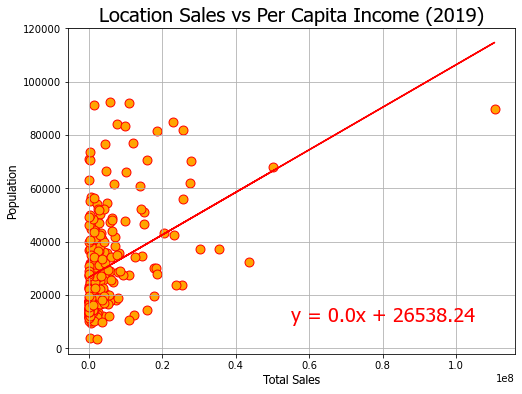

In [15]:
# 2019 zip total sales vs Per Capita Income
plt.figure(figsize=(8,6))
hfont = {'fontname':'Tahoma'}
x_values = clean_regress_2019['total_receipts']
y_values = clean_regress_2019['Per Capita Income']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color='orange',edgecolor="red",s=80)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55000000,10000),font='Tahoma',fontsize=20,color="red")
plt.xlabel('Total Sales',**hfont,fontsize=12)
plt.ylabel('Population',**hfont,fontsize=12)
plt.title("Location Sales vs Per Capita Income (2019)",**hfont,fontsize=20)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../SMU_Project1_Group1/regressiong_sales_vs_income_2019")
plt.show()

The r-squared is: 0.23548527744499823


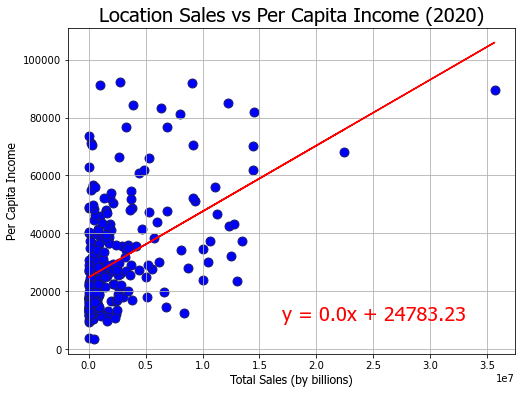

In [14]:
# 2020 zip total sales vs Per Capita Income
plt.figure(figsize=(8,6))
hfont = {'fontname':'Tahoma'}
x_values = clean_regress_2020['total_receipts']
y_values = clean_regress_2020['Per Capita Income']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color='blue',edgecolor="midnightblue",s=80)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17000000,10000),font='Tahoma',fontsize=20,color="red")
plt.xlabel('Total Sales (by billions)',**hfont,fontsize=12)
plt.ylabel('Per Capita Income',**hfont,fontsize=12)
plt.title("Location Sales vs Per Capita Income (2020)",**hfont,fontsize=20)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("../SMU_Project1_Group1/regressiong_sales_vs_income_2020")
plt.show()

The r-squared is: 0.026607114316927073


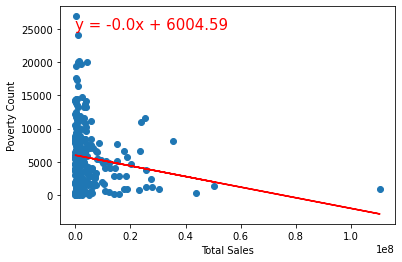

In [16]:
# 2019 zip total sales vs Poverty Count
x_values = clean_regress_2019['total_receipts']
y_values = clean_regress_2019['Poverty Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.6,25000),fontsize=15,color="red")
plt.xlabel('Total Sales')
plt.ylabel('Poverty Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.028748216647811027


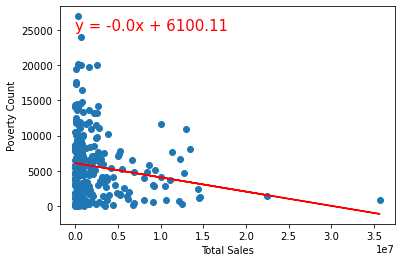

In [17]:
# 2020 zip total sales vs Poverty Count
x_values = clean_regress_2020['total_receipts']
y_values = clean_regress_2020['Poverty Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.6,25000),fontsize=15,color="red")
plt.xlabel('Total Sales')
plt.ylabel('Poverty Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.018496510607882596


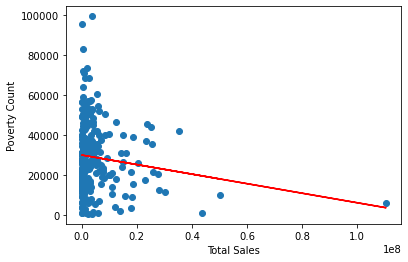

In [18]:
# 2019 zip total sales vs Population
x_values = clean_regress_2019['total_receipts']
y_values = clean_regress_2019['Population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(.6,25000),fontsize=15,color="red")
plt.xlabel('Total Sales')
plt.ylabel('Poverty Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.007278319826071254


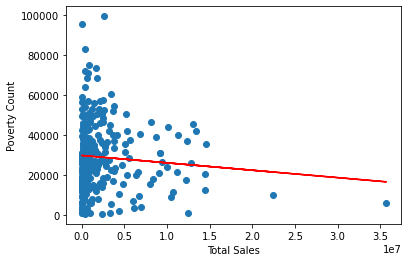

In [19]:
# 2020 zip total sales vs Population
x_values = clean_regress_2020['total_receipts']
y_values = clean_regress_2020['Population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(.6,25000),fontsize=15,color="red")
plt.xlabel('Total Sales')
plt.ylabel('Poverty Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [20]:
cityzip_2019_stores = df_2019.loc[:,["location_zip","location_address"]].drop_duplicates().reset_index(drop=True)
zip_unique_stores = cityzip_2019_stores.location_zip.value_counts().reset_index().rename(columns={'index':'location_zip','location_zip':'store_count'})
zip_unique_stores

,location_zip,store_count
0,78701,206
1,77002,121
2,78205,117
3,75201,95
4,78704,89
...,...,...
269,77204,1
270,75390,1
271,78747,1
272,78739,1


In [21]:
#2019 zip code and census, includes city
cityzip_2019 = pd.DataFrame(df_2019.groupby(['location_city','location_zip'])['total_receipts'].sum()).reset_index()
cityzip_2019 = pd.merge(cityzip_2019,censusdf,on="location_zip",how="left")
cityzip_2019 = cityzip_2019.dropna(how='any')
cityzip_2019 = pd.merge(cityzip_2019,zip_unique_stores,on="location_zip",how='left')
cityzip_2019['store_avg']=cityzip_2019.total_receipts/cityzip_2019.store_count
cityzip_2019.corr()

,location_zip,total_receipts,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,store_count,store_avg
location_zip,1.000000,-0.005664,-0.044182,0.045074,-0.020802,0.029443,-0.131402,-0.167162,-0.038737,0.065094
total_receipts,-0.005664,1.000000,-0.141076,0.114254,0.029733,0.389745,-0.166662,-0.094807,0.911565,0.395643
Population,-0.044182,-0.141076,1.000000,-0.263938,0.138217,-0.247888,0.712013,0.040648,-0.016138,-0.229942
Median Age,0.045074,0.114254,-0.263938,1.000000,0.245795,0.507914,-0.466211,-0.327851,0.118352,0.052159
Household Income,-0.020802,0.029733,0.138217,0.245795,1.000000,0.111494,0.102342,0.144472,0.059675,-0.123054
Per Capita Income,0.029443,0.389745,-0.247888,0.507914,0.111494,1.000000,-0.505567,-0.604243,0.346603,0.385170
Poverty Count,-0.131402,-0.166662,0.712013,-0.466211,0.102342,-0.505567,1.000000,0.596156,-0.093388,-0.281697
Poverty Rate,-0.167162,-0.094807,0.040648,-0.327851,0.144472,-0.604243,0.596156,1.000000,-0.087222,-0.232239
store_count,-0.038737,0.911565,-0.016138,0.118352,0.059675,0.346603,-0.093388,-0.087222,1.000000,0.266513
store_avg,0.065094,0.395643,-0.229942,0.052159,-0.123054,0.385170,-0.281697,-0.232239,0.266513,1.000000


In [22]:
#2020 zip code and census, includes city
cityzip_2020 = pd.DataFrame(df_2020.groupby(['location_city','location_zip'])['total_receipts'].sum()).reset_index()
cityzip_2020 = pd.merge(cityzip_2020,censusdf,on="location_zip",how="left")
cityzip_2020 = pd.merge(cityzip_2020,zip_unique_stores,on="location_zip",how='left')
cityzip_2020['store_avg']=cityzip_2020.total_receipts/cityzip_2019.store_count
cityzip_2020 = cityzip_2020.dropna(how='any')
cityzip_2020.corr()

,location_zip,total_receipts,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,store_count,store_avg
location_zip,1.000000,-0.042848,-0.023804,0.039031,-0.023663,0.015120,-0.106643,-0.144917,-0.032825,-0.082327
total_receipts,-0.042848,1.000000,-0.088363,0.127534,0.046377,0.414304,-0.173482,-0.158662,0.922679,0.411874
Population,-0.023804,-0.088363,1.000000,-0.265541,0.142382,-0.242559,0.710932,0.025504,-0.025260,-0.052300
Median Age,0.039031,0.127534,-0.265541,1.000000,0.250233,0.506782,-0.471019,-0.318966,0.114777,0.114481
Household Income,-0.023663,0.046377,0.142382,0.250233,1.000000,0.111642,0.106419,0.150067,0.060715,0.030344
Per Capita Income,0.015120,0.414304,-0.242559,0.506782,0.111642,1.000000,-0.502422,-0.606450,0.345443,0.259362
Poverty Count,-0.106643,-0.173482,0.710932,-0.471019,0.106419,-0.502422,1.000000,0.586559,-0.102035,-0.122287
Poverty Rate,-0.144917,-0.158662,0.025504,-0.318966,0.150067,-0.606450,0.586559,1.000000,-0.096401,-0.140768
store_count,-0.032825,0.922679,-0.025260,0.114777,0.060715,0.345443,-0.102035,-0.096401,1.000000,0.325765
store_avg,-0.082327,0.411874,-0.052300,0.114481,0.030344,0.259362,-0.122287,-0.140768,0.325765,1.000000


<AxesSubplot:>

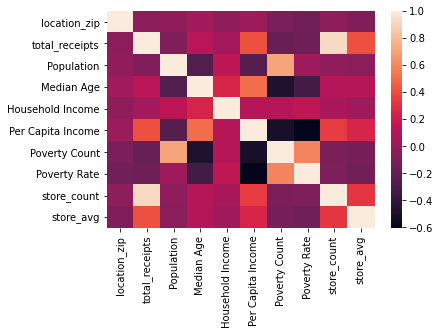

In [23]:
sn.heatmap(cityzip_2020.corr())

The r-squared is: 0.8309502584663078


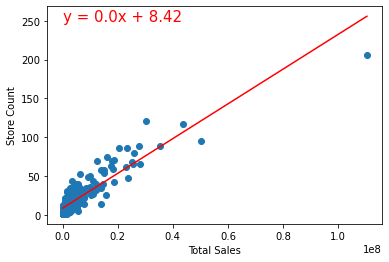

In [24]:
# 2019 zip total sales vs store count
x_values = cityzip_2019['total_receipts']
y_values = cityzip_2019['store_count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,250),fontsize=15,color="red")
plt.xlabel('Total Sales')
plt.ylabel('Store Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.8513368929861524


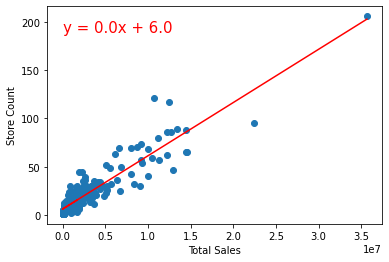

In [25]:
# 2020 zip total sales vs store count
x_values = cityzip_2020['total_receipts']
y_values = cityzip_2020['store_count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,190),fontsize=15,color="red")
plt.xlabel('Total Sales')
plt.ylabel('Store Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.15653337050829438


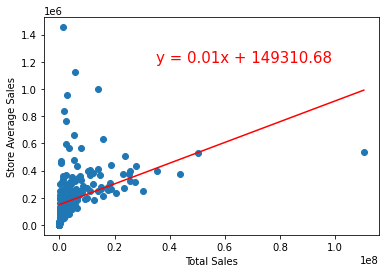

In [26]:
# 2019 zip total sales vs store count
x_values = cityzip_2019['total_receipts']
y_values = cityzip_2019['store_avg']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35000000,1200000),fontsize=15,color="red")
plt.xlabel('Total Sales')
plt.ylabel('Store Average Sales')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1696405227418877


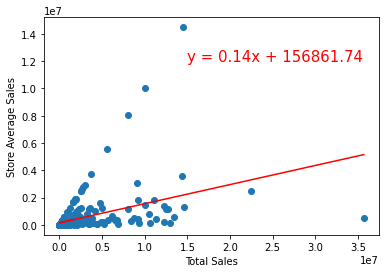

In [27]:
# 2020 zip total sales vs store count
x_values = cityzip_2020['total_receipts']
y_values = cityzip_2020['store_avg']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000000,12000000),fontsize=15,color="red")
plt.xlabel('Total Sales')
plt.ylabel('Store Average Sales')
print(f"The r-squared is: {rvalue**2}")
plt.show()